In [1]:
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt
import contextily as ctx
%matplotlib inline

public_transport_fp = "data/citybahn_cologne_withoutbonn_buffered.geojson"
clubs_fp = "data/clubs_cologne.geojson"

# Read files
public_transport = gpd.read_file(public_transport_fp)
clubs = gpd.read_file(clubs_fp)

# check crs
print(public_transport.crs, clubs.crs)
print(f"Layer crs: {CRS(public_transport.crs).name}")
# crs is wgs84 so not projected

epsg:4326 epsg:4326
Layer crs: WGS 84


In [2]:
public_transport = public_transport.to_crs(epsg=3857)
clubs = clubs.to_crs(epsg=3857)

# should be ETRS89 UTM32N
print(f"Layer crs: {CRS(clubs.crs).name}")
# should be true
public_transport.crs == clubs.crs
ctx.providers.Stamen.keys()

Layer crs: WGS 84 / Pseudo-Mercator


dict_keys(['Toner', 'TonerBackground', 'TonerHybrid', 'TonerLines', 'TonerLabels', 'TonerLite', 'Watercolor', 'Terrain', 'TerrainBackground', 'TopOSMRelief', 'TopOSMFeatures'])

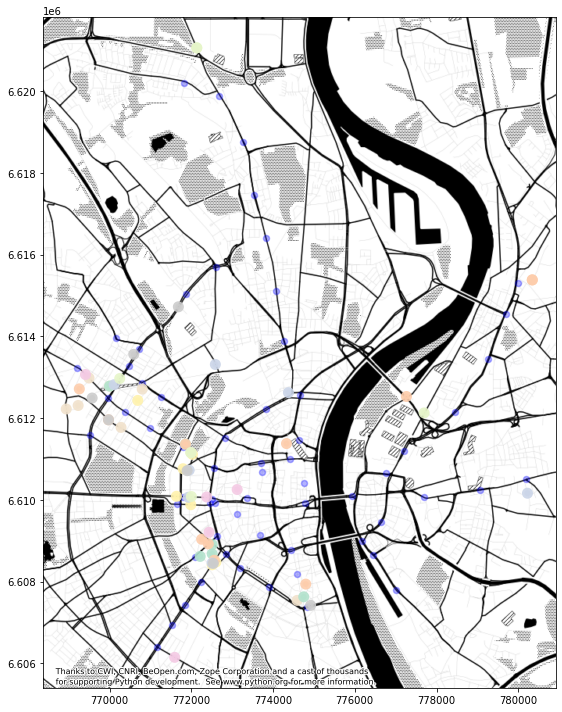

In [3]:
# Create one subplot. Control figure size in here.
fig, ax = plt.subplots(figsize=(13,10))

# Visualize the travel times into 9 classes using "Quantiles" classification scheme
public_transport.plot(ax=ax, color="blue", linewidth=1.5,  alpha=0.3)

clubs.plot(ax=ax, column="musik", linewidth=5, cmap="Pastel2", alpha=0.9)
ctx.add_basemap(ax, zoom=13, attribution=credits, source=ctx.providers.Stamen.TonerBackground)

# Remove the empty white-space around the axes
plt.tight_layout()

In [4]:
# import libs
import folium as folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from pyproj import crs
import geopandas as gpd
import matplotlib.pyplot as plt



# load data
public_transport_fp = "data/citybahn_cologne.geojson"
clubs_fp = "data/clubs_cologne.geojson"
public_transport = gpd.read_file(public_transport_fp)
clubs = gpd.read_file(clubs_fp)

clubs["x"] = clubs["geometry"].x
clubs["y"] = clubs["geometry"].y

my_tooltip = folium.features.GeoJsonTooltip(
    fields=["club", "strasse", "plz", "musik"],
    aliases=["Name:", "Street:", "Postal Code:", "Genres:"],
    labels=True,
    sticky=False
)

# create popup
my_popup = folium.features.GeoJsonPopup(
    fields=["club", "strasse", "plz", "musik"],
    aliases=["Name:", "Street:", "Postal Code:", "Genres:"],
    localize=True,
    parse_html=True
)

# add folium point data
clubs_folium =  folium.features.GeoJson(clubs, name="Clubs Cologne", 
                                        popup=my_popup, 
                                        tooltip=my_tooltip, 
                                        style_function= lambda x :{'fillColor': 'red'}, 
                                        show=True
                                       )
public_transport_folium = folium.features.GeoJson(public_transport, name="Tram Stations Cologne-Bonn",)


m = folium.Map(location=[50.93, 6.96], zoom_start=13, control_scale=True,  tiles = 'cartodbpositron')
# create folium instance

clubs_folium.add_to(m)

# Create a list of coordinate pairs
#public_transport_folium.add_to(m, show=False)
folium.LayerControl().add_to(m)

m

#'''outfp = "clubs_cologne.html"
#m.save(outfp)'''

In [5]:
locations

NameError: name 'locations' is not defined

In [ ]:
clubs.head()